In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings as wn
wn.filterwarnings('ignore')

### Data Reading and Understanding

In [2]:
data = pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [5]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.shape

(5572, 2)

In [7]:
data['Category'] = data['Category'].map({'ham':0,'spam':1})

In [8]:
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Data Visualization

<Axes: xlabel='Category'>

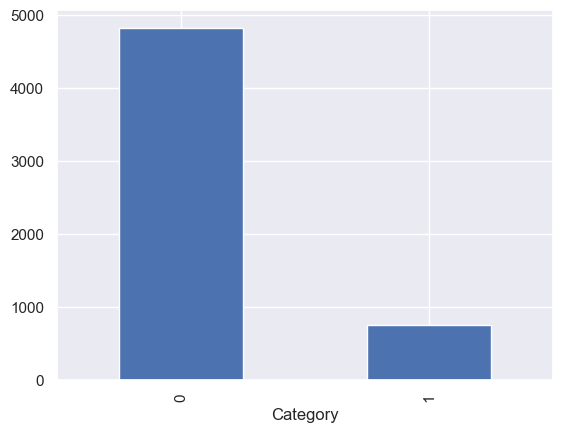

In [9]:
data.Category.value_counts().plot(kind='bar')

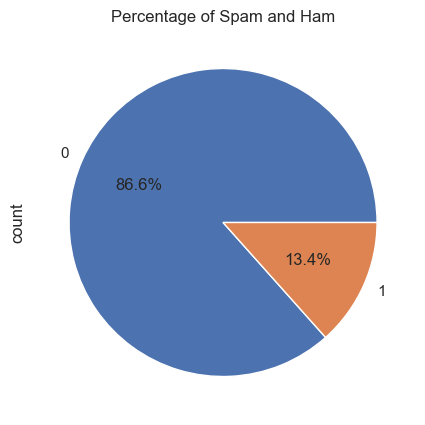

In [10]:
plt.figure(figsize=(15,5))
plt.title('Percentage of Spam and Ham')
data.Category.value_counts().plot(kind='pie',autopct='%1.1f%%')
# plt.legend()
plt.show()

### Training and Testing Data Split

In [11]:
x = data['Message']
y = data['Category']

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
tf = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [14]:
xtrain = tf.fit_transform(xtrain)
xtest = tf.transform(xtest)
ytrain = ytrain.astype('int64')
ytest = ytest.astype('int64')

### Logistic Regression

In [15]:
lr = LogisticRegression()

In [16]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
predictions=lr.predict(xtest)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
accuracy = accuracy_score(ytest,predictions)
accuracy * 100

96.7713004484305

In [19]:
r2_score(ytest,predictions)

0.7211221809996249

In [ ]:
###KNeighbors classfier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
kn = KNeighborsClassifier()

In [22]:
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [23]:
predictions = kn.predict(xtest)

In [24]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
accuracy_score(ytest,predictions) * 100

91.30044843049328

In [26]:
    from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [29]:
predictions = rf.predict(xtest)

In [30]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
accuracy_score(ytest,predictions) * 100

98.02690582959642

In [32]:
    from sklearn.ensemble import AdaBoostClassifier

In [33]:
ada = AdaBoostClassifier()

In [34]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [35]:
predictions = ada.predict(xtest)

In [36]:
accuracy_score(ytest,predictions) * 100

97.30941704035875

In [37]:
accuracyframe = pd.DataFrame(columns=['Method','Accuracy Score'])

In [38]:
accuracyframe

,Method,Accuracy Score


In [39]:
accuracyframe['Method'] = ('Logistic Regression','Random forest Classifier','KNeighbors','AdaBoostClassifier')
accuracyframe['Accuracy Score'] = ('96.77','97.84','91.30','97.30')

In [40]:
accuracyframe

,Method,Accuracy Score
0,Logistic Regression,96.77
1,Random forest Classifier,97.84
2,KNeighbors,91.30
3,AdaBoostClassifier,97.30
